#Pertemuan 6

## Library

In [40]:
import numpy as np
import pandas as pd

# matplotlib untuk visualisasi
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# standardscaler untuk preprocessing restandard data
from sklearn.preprocessing import StandardScaler

# modeling hirarki clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# metric untuk evaluasi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv')
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


In [3]:
# informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      372 non-null    int64  
 1   activeness_score         372 non-null    int64  
 2   assignment_score         364 non-null    float64
 3   pre_test_score           336 non-null    float64
 4   post_test_score          363 non-null    float64
 5   midterm_test_score       361 non-null    float64
 6   end_semester_test_score  372 non-null    int64  
 7   pass_test                372 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [4]:
# informasi statistik dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npm,372.0,2.022041e+09,107.531391,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09
activeness_score,372.0,9.275806e+01,44.578778,-9.600000e+01,8.500000e+01,9.000000e+01,9.500000e+01,6.660000e+02
assignment_score,364.0,8.532967e+01,8.626380,7.000000e+01,7.900000e+01,8.500000e+01,9.200000e+01,1.000000e+02
pre_test_score,336.0,5.798810e+01,26.472625,1.000000e+01,3.500000e+01,6.150000e+01,8.100000e+01,1.000000e+02
post_test_score,363.0,5.279890e+01,25.691020,1.000000e+01,3.200000e+01,5.100000e+01,7.400000e+01,1.000000e+02
midterm_test_score,361.0,5.339889e+01,24.968789,1.000000e+01,3.200000e+01,5.300000e+01,7.300000e+01,1.000000e+02
end_semester_test_score,372.0,5.333065e+01,30.695107,-9.700000e+01,3.100000e+01,5.250000e+01,7.900000e+01,1.000000e+02


In [5]:
# jumlah Nan / missing values setiap column
df.isna().sum()

npm                         0
activeness_score            0
assignment_score            8
pre_test_score             36
post_test_score             9
midterm_test_score         11
end_semester_test_score     0
pass_test                   0
dtype: int64

## Preprocessing

In [6]:
# hapus data outlier
df.loc[df['activeness_score']<0, 'activeness_score'] = np.nan
df.loc[df['activeness_score']>100, 'activeness_score'] = np.nan

In [7]:
# assign missing values dengan mean untuk setiap column yang ada missing nya
df['activeness_score'].fillna(value=df['activeness_score'].mean(), inplace=True)
df['assignment_score'].fillna(value=df['assignment_score'].mean(), inplace=True)
df['pre_test_score'].fillna(value=df['pre_test_score'].mean(), inplace=True)
df['post_test_score'].fillna(value=df['post_test_score'].mean(), inplace=True)
df['midterm_test_score'].fillna(value=df['midterm_test_score'].mean(), inplace=True)

In [8]:
# hapus kolom yang tidak diperlukan
df_clean = df.drop(['npm','pass_test'], axis=1)

In [9]:
# rescale data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

## Modeling
Modeling/Training data menggunakan algoritma hierarchical clustering

In [17]:
# lihat pemetaan clustering berdasarkan hirarki dengan metode divisive
complete_clustering = linkage(scaled_data, method='complete', metric='euclidean')
average_clustering = linkage(scaled_data, method='average', metric='euclidean')
single_clustering = linkage(scaled_data, method='single', metric='euclidean')

In [19]:
# berhubung clustering ini menggunakan pendekatan hirarki
# maka digunakan visualisasi untuk lebih mudah pemetaannya
def plot_dendrogram(clusters):
  plt.figure(figsize=(20,6))
  dendrogram(clusters, orientation='top', leaf_font_size=9, leaf_rotation=360)
  plt.ylabel('Euclidean Distance');

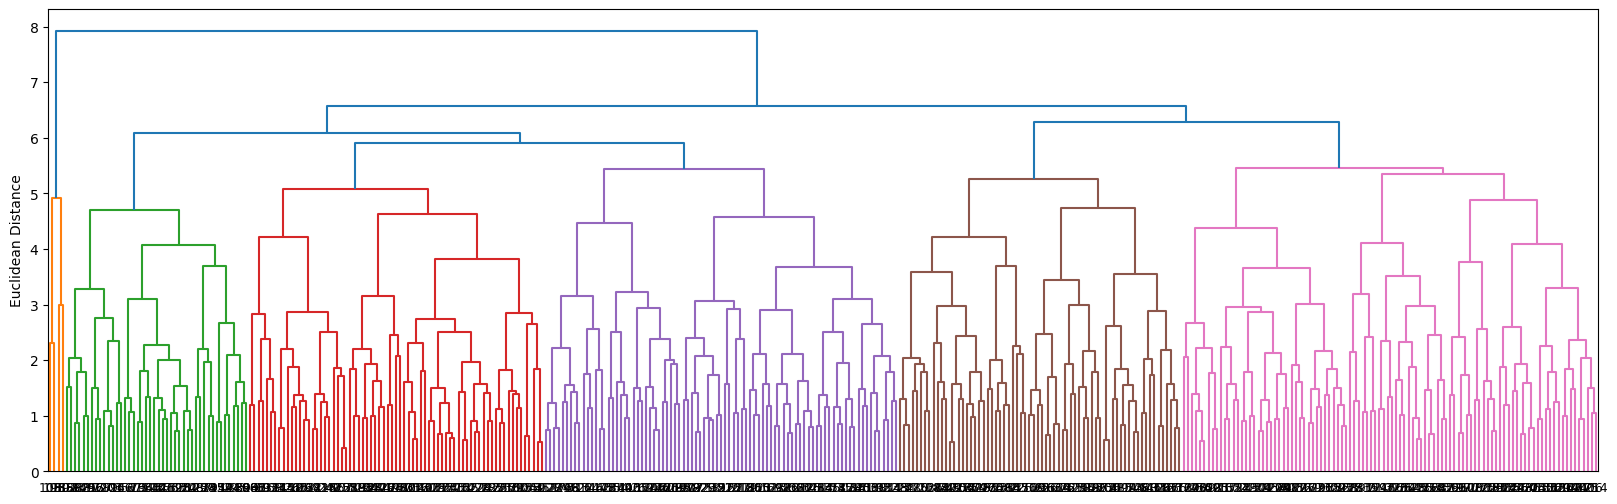

In [20]:
plot_dendrogram(complete_clustering)

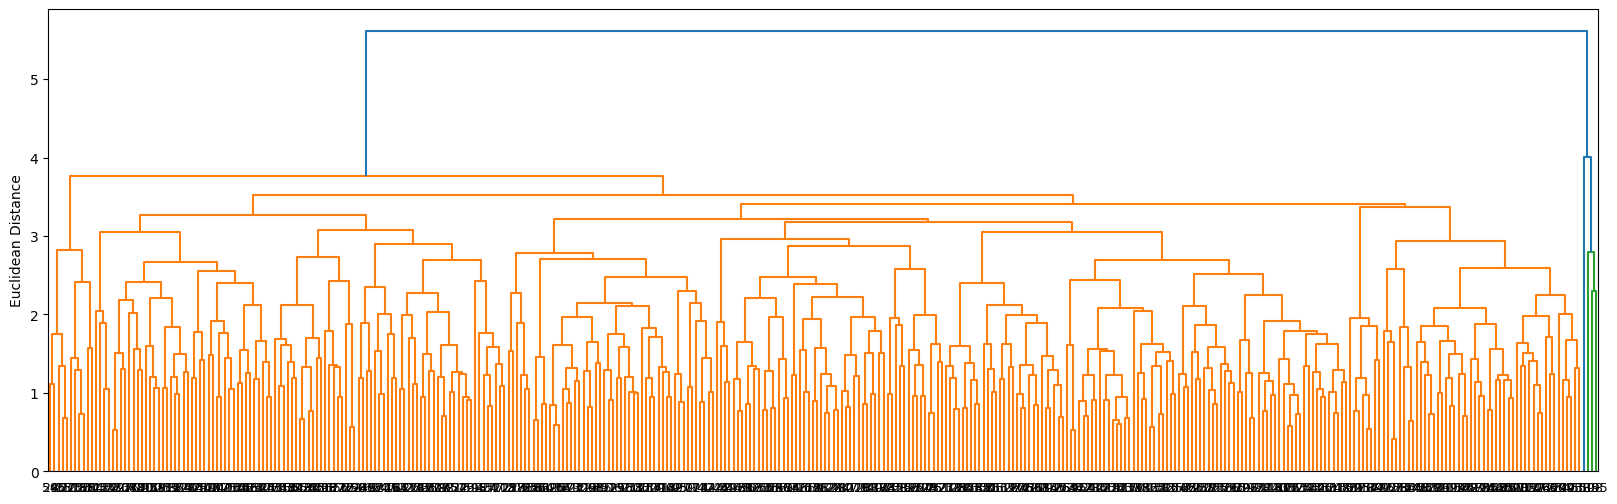

In [21]:
plot_dendrogram(average_clustering)

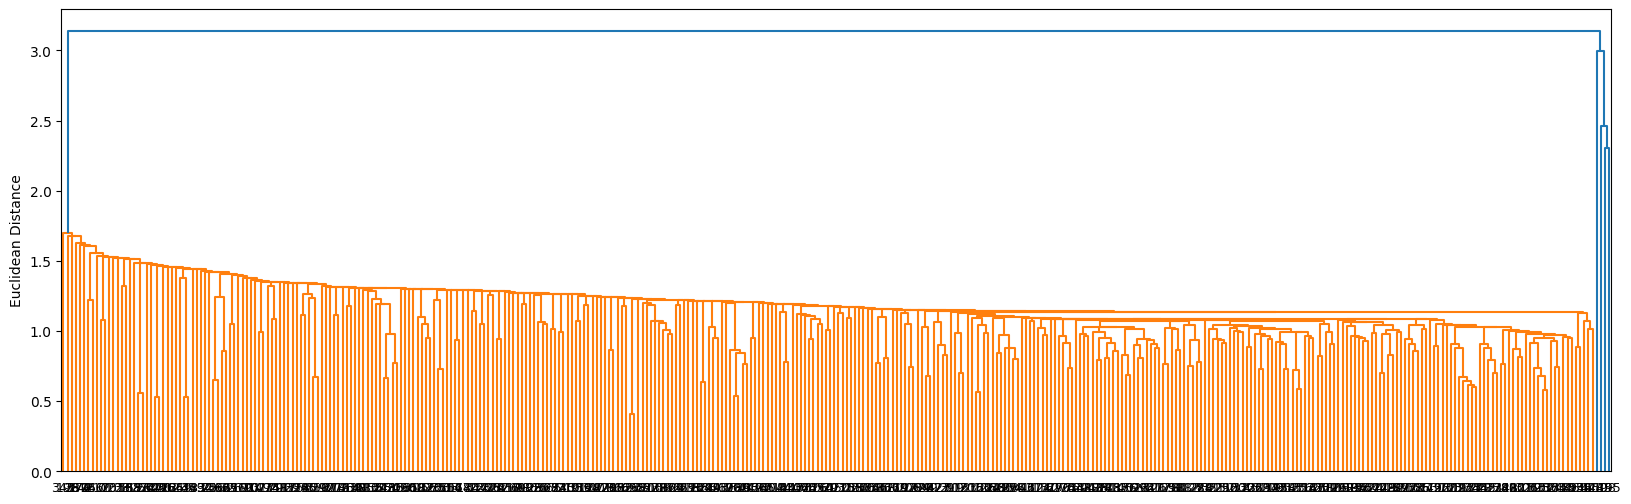

In [22]:
plot_dendrogram(single_clustering)

In [23]:
# predict data cluster bisa menggunakan agglomerative
# karena sama-sama pendekatan clustering hirarki
# asal parameternya sama dengan divisive sebelumnya
model = AgglomerativeClustering(n_clusters=2, metric='euclidean').fit(scaled_data)
# hasil clustering
label = model.labels_

## Evaluation
Evaluation hasil data clustering menggunakan beberapa metric

In [24]:
Z = df_clean.copy()

In [26]:
# Silhoette Score dapat digunakan untuk mengevaluasi pemisahan suatu cluster
# selain itu matriks ini dapat mengevaluasi apakah cluster overlapping atau tidak
ss = silhouette_score(Z, label)
print(f'Silhouette score yang didapat adalah: {ss}')

Silhouette score yang didapat adalah: 0.044983119250411416


In [27]:
# Calinski Harabanz (CH) Score dapat digunakan untuk mengevaluasi jumlah suatu cluster
# Semakin besar nilai CH semakin bagus jumlah suatu cluster
sc = calinski_harabasz_score(Z, label)
print(f'Calonski Harabanz Score yang didapat adalah {sc}')

Calonski Harabanz Score yang didapat adalah 20.53521313248751


In [28]:
# Matrik ini dapat digunakan untuk mengevaluasi suatu model cluster
sd = davies_bouldin_score(Z, label)
print(f'Davies Bouldin Score yang didapat adalah: {sd}')

Davies Bouldin Score yang didapat adalah: 3.9264680224828767


# Tugas

Buat visualisasi clustering

In [32]:
df_clean

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score
0,99.0,71.00000,93.000000,52.000000,44.0,24
1,96.0,77.00000,57.988095,27.000000,100.0,89
2,86.0,71.00000,84.000000,17.000000,21.0,41
3,81.0,96.00000,57.988095,52.798898,11.0,99
4,93.0,85.00000,68.000000,29.000000,44.0,50
...,...,...,...,...,...,...
367,91.0,85.32967,31.000000,52.000000,31.0,46
368,96.0,87.00000,55.000000,56.000000,95.0,11
369,90.0,83.00000,89.000000,15.000000,86.0,13
370,84.0,92.00000,87.000000,97.000000,42.0,27


In [34]:
actual_cluster = [0 if x == 'not pass' else 1 for x in df['pass_test']]
df_clean['pass'] = actual_cluster
df_clean

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass
0,99.0,71.00000,93.000000,52.000000,44.0,24,0
1,96.0,77.00000,57.988095,27.000000,100.0,89,1
2,86.0,71.00000,84.000000,17.000000,21.0,41,0
3,81.0,96.00000,57.988095,52.798898,11.0,99,0
4,93.0,85.00000,68.000000,29.000000,44.0,50,0
...,...,...,...,...,...,...,...
367,91.0,85.32967,31.000000,52.000000,31.0,46,0
368,96.0,87.00000,55.000000,56.000000,95.0,11,1
369,90.0,83.00000,89.000000,15.000000,86.0,13,0
370,84.0,92.00000,87.000000,97.000000,42.0,27,1


In [35]:
df_clean.isna().sum()

activeness_score           0
assignment_score           0
pre_test_score             0
post_test_score            0
midterm_test_score         0
end_semester_test_score    0
pass                       0
dtype: int64

In [36]:
predicted_cluster = AgglomerativeClustering().fit(df_clean)
df_clean['cluster'] = predicted_cluster.labels_
df_clean

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass,cluster
0,99.0,71.00000,93.000000,52.000000,44.0,24,0,1
1,96.0,77.00000,57.988095,27.000000,100.0,89,1,0
2,86.0,71.00000,84.000000,17.000000,21.0,41,0,0
3,81.0,96.00000,57.988095,52.798898,11.0,99,0,0
4,93.0,85.00000,68.000000,29.000000,44.0,50,0,0
...,...,...,...,...,...,...,...,...
367,91.0,85.32967,31.000000,52.000000,31.0,46,0,1
368,96.0,87.00000,55.000000,56.000000,95.0,11,1,1
369,90.0,83.00000,89.000000,15.000000,86.0,13,0,0
370,84.0,92.00000,87.000000,97.000000,42.0,27,1,1


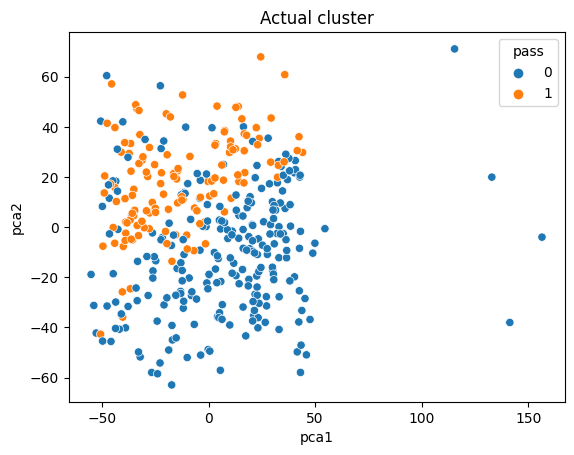

In [54]:
reduced_data = PCA(n_components=2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns=['pca1','pca2'])
sns.scatterplot(x='pca1', y='pca2', hue = df_clean['pass'], data = df_reduced_data)
plt.title('Actual cluster')
plt.show()

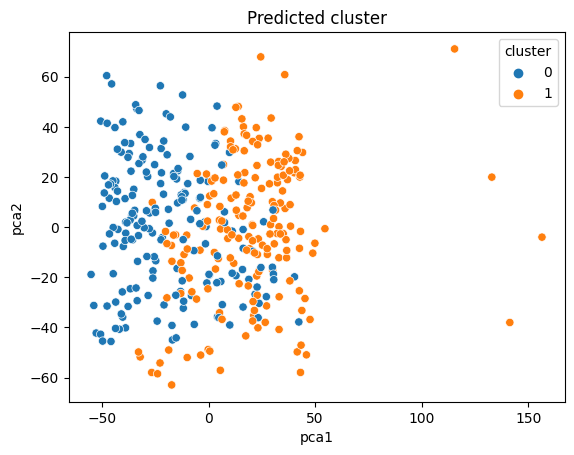

In [53]:
reduced_data = PCA(n_components=2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns=['pca1','pca2'])
sns.scatterplot(x='pca1', y='pca2', hue = df_clean['cluster'], data = df_reduced_data)
plt.title('Predicted cluster')
plt.show()